In [1]:
import yfinance as yf
import pathlib
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from backtesting_v2_9 import *

%load_ext autoreload
%autoreload 2

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'

RAW_PRICES_DIR = DATA_DIR / 'prices' / 'raw'
COMPILED_PRICES_DIR = DATA_DIR / 'prices' / 'compiled'

PROCESSED_XP_DIR = DATA_DIR / 'xp' / 'processed'

with open(COMPILED_PRICES_DIR / 'compiled.pkl', 'rb') as f:
    prices_df = pickle.load(f)
    
with open(PROCESSED_XP_DIR / 'data.pkl', 'rb') as f:
    xp_data = pickle.load(f)

In [3]:
SIM_DATE_FROM = "2021-12-01"
SIM_DATE_TO = "2024-05-31"
CDI = 11.59
INITIAL_CAPITAL = 100000

In [4]:
prices_df

,RAIZ4.SA,TOTS3.SA,CPLE6.SA,ITUB4.SA,SMFT3.SA,GGBR4.SA,ELET3.SA,PETZ3.SA,PETR4.SA,WEGE3.SA,...,SOMA3.SA,RENT3.SA,GMAT3.SA,VALE3.SA,SMTO3.SA,JBSS3.SA,SBSP3.SA,ARZZ3.SA,VIVA3.SA,RADL3.SA
0,4.923124,28.930948,5.128630,19.539875,16.659586,16.114634,31.568790,18.324335,11.870057,31.075983,...,12.677909,47.320843,5.661659,57.687241,31.882263,30.082554,31.784008,64.599976,23.172520,20.379776
1,5.102473,29.377386,5.262932,20.278564,17.071175,17.032127,33.255669,17.956856,12.775752,31.295971,...,12.413173,50.428009,5.721360,60.365013,32.644024,31.082943,34.348442,67.965347,22.695717,20.772228
2,5.398399,29.600601,5.212569,20.208214,17.874754,17.149120,34.113567,18.999704,12.955945,31.353357,...,13.217185,51.498138,5.860662,59.034340,32.383907,29.577929,34.928715,69.732635,23.401382,21.323544
3,5.228017,29.717064,5.153812,20.445650,18.315744,17.549372,34.393112,18.791134,13.014510,31.573351,...,13.364262,51.413662,6.069616,62.237808,33.238556,29.870083,35.387318,71.175529,24.135654,21.295507
4,5.308724,30.454651,5.237750,20.190624,18.119749,17.826466,33.872585,19.585688,13.226236,33.055897,...,13.638802,50.587589,6.258670,62.697800,33.350037,30.463230,35.555786,70.237274,23.840038,21.753378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,2.830000,29.680000,9.400000,32.141708,22.330000,18.450001,36.139999,3.960000,36.810001,39.029999,...,6.030000,45.700001,7.620000,65.050003,27.340000,29.480000,75.360001,50.950001,22.150000,26.660000
618,2.830000,29.059999,9.300000,31.831884,21.860001,18.719999,36.200001,3.830000,36.610001,38.340000,...,6.070000,45.400002,7.510000,65.080002,26.910000,29.360001,75.610001,50.959999,22.209999,26.059999
619,2.900000,28.820000,9.300000,31.721947,21.600000,18.510000,36.200001,3.800000,37.009998,38.349998,...,6.030000,44.939999,7.560000,65.300003,27.049999,28.959999,75.070000,50.970001,22.490000,25.920000
620,2.850000,28.500000,9.310000,31.552042,22.000000,18.469999,35.860001,3.800000,37.799999,38.230000,...,6.060000,44.560001,7.500000,63.889999,27.500000,28.950001,74.629997,50.990002,22.480000,25.830000


In [5]:
benchmark_ticker = 'BOVA11.SA'
data = yf.download(benchmark_ticker, start=SIM_DATE_FROM, end=SIM_DATE_TO)
bova = data.dropna()

# Save to csv in prices folder
bova.to_csv(RAW_PRICES_DIR / f'{benchmark_ticker}.csv')

[*********************100%%**********************]  1 of 1 completed


In [6]:
bova

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,99.260002,100.180000,96.910004,97.089996,97.089996,14177070
2021-12-02,98.449997,100.430000,98.300003,100.430000,100.430000,11747920
2021-12-03,100.860001,102.839996,100.150002,101.320000,101.320000,11461680
2021-12-06,101.980003,103.570000,101.680000,103.000000,103.000000,9256574
2021-12-07,104.500000,104.500000,103.120003,103.629997,103.629997,7162804
...,...,...,...,...,...,...
2024-05-23,122.000000,122.050003,120.800003,121.099998,121.099998,5528040
2024-05-24,121.269997,121.639999,120.629997,120.639999,120.639999,3789370
2024-05-27,120.870003,120.940002,120.449997,120.870003,120.870003,2204985


In [7]:
benchmark_ticker = 'BOVA11.SA'

prices = pd.DataFrame()
prices[benchmark_ticker] = pd.read_csv(RAW_PRICES_DIR / '{}.csv'.format(benchmark_ticker))['Adj Close'].iloc[252:]

prices = prices.dropna()
prices

,BOVA11.SA
252,105.629997
253,106.739998
254,105.589996
255,103.570000
256,103.900002
...,...
617,121.099998
618,120.639999
619,120.870003
620,120.180000


In [8]:
files = dict()
tickers = list()
for file in RAW_PRICES_DIR.glob('*.csv'):
    ticker = file.stem
    tickers.append(ticker)
    files[ticker] = file
    

In [9]:
from backtesting_v2_9 import *

def benchmark():
    if position[benchmark_ticker] == 0:
        BUY(symbol=benchmark_ticker, quantity=INITIAL_CAPITAL//prices[benchmark_ticker]['Close'].iloc[-1])


print(simple_test(tickers, SIM_DATE_FROM, SIM_DATE_TO, benchmark, risk_free_rate=CDI, capital=INITIAL_CAPITAL, files=files, file_type=MarketData.HIST))

Gross Profit: $22668.88
Gross Loss: $0.00
Gross Total: $22668.88

Number of trades: 1
Hitting Ratio: 100.00%
Number of profit trades: 1
Number of loss trades: 0
Average number of events per trade: 622.00

Max win trade: $22668.88
Avg win trade: $22668.88
Max loss trade: $-
Avg loss trade: $-
Avg all trades: $22668.88
Win/Loss ratio: -

Max Profit: $34265.70
Max Profit High/Low: $34399.48
Max Drawdown: $-4671.65
Max Drawdown High/Low: $-5340.50

Max Allocation: $99905.61
Avg Allocation: $99905.61
Max Cash Required (margin): $99905.61

Gross Total: $22668.88
Total Fees: $0.20
Total Taxes: $3401.33
Net Total: $19267.35

Gross Return: 22.69%
Average Return: 22.69%
Net Return: 19.29%
Net Return Avg Alocation: 19.29%

Number of days: 622
Initial Capital: $100000.00
Risk Free Rate: 11.59% yearly/0.0435% daily
Total Carry: $81.21
Net Total + Carry: $19348.56
Net Return Capital: 19.35%
Net Return Capital Yearly: 7.43%




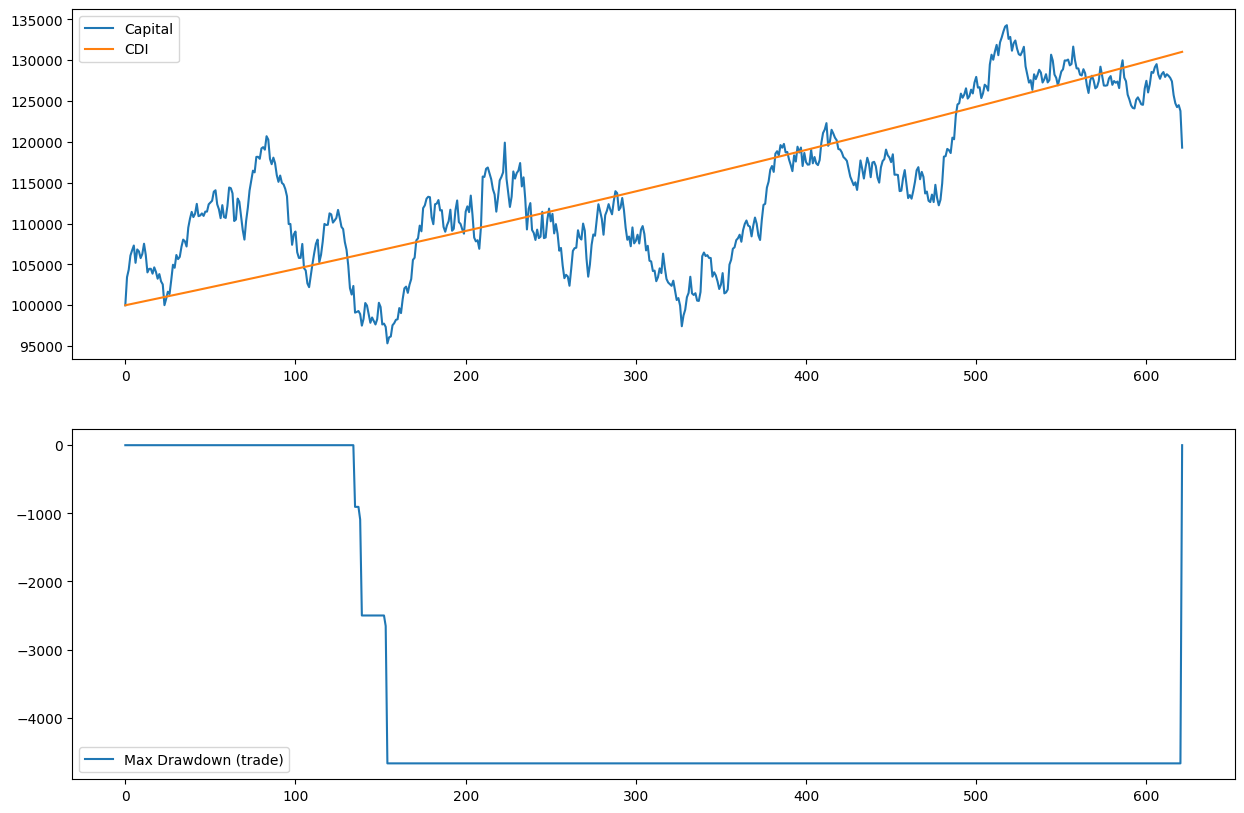

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].plot([day[0] for day in strategy[0]._days.values()][:]);
ax[0].plot([day[0] for day in strategy[1]._days.values()][:]);
ax[0].legend(["Capital", "CDI"]);

ax[1].plot([day[2] for day in strategy[0]._days.values()][:]);
ax[1].legend(["Max Drawdown (trade)"]);

bnh = [day[0] for day in strategy[0]._days.values()][:]

In [45]:
class PortfolioStock:
    def __init__(self, quantity, price, weight):
        self.quantity = quantity
        self.price = price
        self.total = quantity * price
        self.weight = weight
        
    def __repr__(self) -> str:
        return f'PortfolioStock(quantity={self.quantity}, price={self.price}, total={self.total}, weight={self.weight})'
    
    def update(self, price):
        self.price = price
        self.total = self.quantity * price

class Portfolio:
    def __init__(self, initial_capital):
        self.stocks = dict()
        self.allocated = 0
        self.unallocated = initial_capital
        self.total = initial_capital
    
    def print(self) -> str:
        ret = ''
        for ticker, stock in self.stocks.items():
            ret += f'{ticker}: R${round(stock.total, 2)} ({round(100*stock.weight, 2)})%\n'
        ret += f'Unallocated: R${round(self.unallocated, 2)} ({round(100*self.unallocated/(self.allocated + self.unallocated), 2)})%\n'
        ret += f'Total: R${round(self.total, 2)}'
        print(ret)
        
    def update(self, capital):
        self.unallocated = capital
        self.allocated = sum([stock.total for stock in self.stocks.values()])
        self.total = self.allocated + self.unallocated
        for stock in self.stocks.values():
            stock.weight = stock.total / self.total

In [47]:
last_key = '2021-11'
portfolio = Portfolio(INITIAL_CAPITAL)

print('Portfolio no início')
portfolio.print()

def update_key(reference):
    month = reference.month
    year = reference.year
    carteira_recomendada_key = f"{year}-{month}"
    if month < 10:
        carteira_recomendada_key = f"{year}-0{month}"
    else:
        carteira_recomendada_key = f"{year}-{month}"
    
    return carteira_recomendada_key

def no_balancing():
    
    global last_key, portfolio

    reference = prices[tickers[0]].index[-1]
    sync = True
    for ticker in tickers:
        if prices[ticker].index[-1] != reference:
            sync = False
    
    carteira_recomendada_key = update_key(reference)
                    
    if carteira_recomendada_key != last_key and sync:
        print('*'*50)
        print('NOVO MÊS', reference)
        last_key = carteira_recomendada_key
        carteira_recomendada = xp_data[carteira_recomendada_key]
        
        sold_stocks = []

        # Vendendo ações que não estão mais na carteira e atualizando preços
        for ticker, stock in portfolio.stocks.items():
            if ticker not in carteira_recomendada.index:
                # Venda a mercado
                SEND(Order(instrument=ticker, side=Order.S, quantity=stock.quantity, price=0))
                sold_stocks.append(ticker)
            else:
                stock.update(prices[ticker]['Close'].iloc[-1])
        
        for ticker in sold_stocks:
            del portfolio.stocks[ticker]
        
        for ticker in carteira_recomendada.index:
            # Rebalanceando ações que continuam na carteira
            if ticker in portfolio.stocks:
                stock = portfolio.stocks[ticker]
                weight_diff = carteira_recomendada.loc[ticker, 'portfolio_weight'] - stock.weight
                if weight_diff > 0:
                    reserved_capital = weight_diff * portfolio.total
                    quantity = reserved_capital // prices[ticker]['Close'].iloc[-1]
                    # Venda a mercado
                    SEND(Order(instrument=ticker, side=Order.S, quantity=quantity, price=0))
                elif weight_diff < 0:
                    reserved_capital = abs(weight_diff) * portfolio.total
                    quantity = reserved_capital // prices[ticker]['Close'].iloc[-1]
                    # Compra a mercado
                    SEND(Order(instrument=ticker, side=Order.B, quantity=quantity, price=0))
                else: pass
            # Compra de ações novas
            else:
                weight = carteira_recomendada.loc[ticker, 'portfolio_weight']
                price = prices[ticker]['Close'].iloc[-1]
                quantity = (portfolio.total * weight) // price
                # Compra a mercado
                SEND(Order(instrument=ticker, side=Order.B, quantity=quantity, price=0))
                portfolio.stocks[ticker] = PortfolioStock(quantity, prices[ticker]['Close'].iloc[-1], weight)

        portfolio.update(capital=capital)
        print('Portfolio depois')
        portfolio.print()
                
print(simple_test(tickers, SIM_DATE_FROM, SIM_DATE_TO, no_balancing, risk_free_rate=CDI, capital=INITIAL_CAPITAL, files=files, file_type=MarketData.HIST, print_fill=True))

Portfolio no início
Unallocated: R$100000 (100.0)%
Total: R$100000
**************************************************
NOVO MÊS 2021-12-01 00:00:00
2021-12-01 00:00:00 ARZZ3.SA order filled: 154.0@64.5999755859375
2021-12-01 00:00:00 ASAI3.SA order filled: 813.0@12.29580020904541
2021-12-01 00:00:00 BBAS3.SA order filled: 753.0@13.27151870727539
2021-12-01 00:00:00 GGBR4.SA order filled: 620.0@16.114633560180664
2021-12-01 00:00:00 RENT3.SA order filled: 211.0@47.32084274291992
2021-12-01 00:00:00 RADL3.SA order filled: 490.0@20.379776000976562
2021-12-01 00:00:00 RAIL3.SA order filled: 576.0@17.35117530822754
2021-12-01 00:00:00 SMTO3.SA order filled: 313.0@31.88226318359375
2021-12-01 00:00:00 VALE3.SA order filled: 173.0@57.68724060058594
2021-12-01 00:00:00 WEGE3.SA order filled: 321.0@31.07598304748535
Portfolio depois
ARZZ3.SA: R$9948.4 (9.95)%
ASAI3.SA: R$9996.49 (10.0)%
BBAS3.SA: R$9993.45 (9.99)%
GGBR4.SA: R$9991.07 (9.99)%
RENT3.SA: R$9984.7 (9.98)%
RADL3.SA: R$9986.09 (9.99)%